# Visualizations

### Table of Contents

1. Importing Libraries and data
2. Bar charts
3. Histograms
4. Line charts

#### 1. Import data and libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data

# identifying project path
project =r'D:\Adam\Employment\Data Analysis Course\Python Instacart project'

# Import Instacart prepared orders data
df = pd.read_pickle(os.path.join(project, '02 Data', 'Prepared Data', 'orders_products_new_vars.pkl'))

In [3]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_item_price,spender_type,avg_days_since_last_order,order_frequency
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,Newer customer,6.367797,Low spender,20.259259,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Mid-range product,Regularly busy,Least busy,Average orders,10,Newer customer,6.367797,Low spender,20.259259,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Mid-range product,Regularly busy,Least busy,Most orders,10,Newer customer,6.367797,Low spender,20.259259,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Mid-range product,Least busy,Least busy,Average orders,10,Newer customer,6.367797,Low spender,20.259259,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Mid-range product,Least busy,Least busy,Most orders,10,Newer customer,6.367797,Low spender,20.259259,Non-frequent customer


In [4]:
df.shape

(32404859, 24)

In [25]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_item_price', 'spender_type', 'avg_days_since_last_order',
       'order_frequency'],
      dtype='object')

#### 2. Bar Charts

<AxesSubplot:>

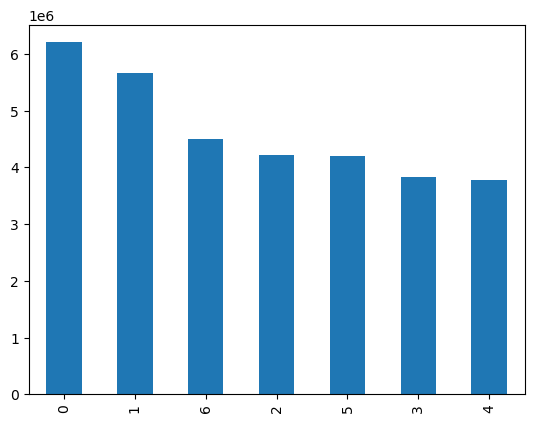

In [5]:
df['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

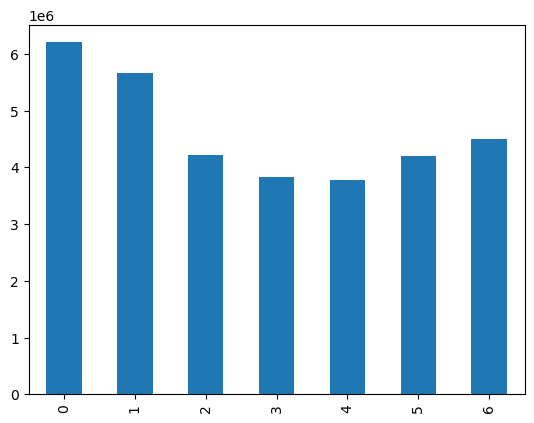

In [6]:
# Sorting by index order instead of greatest to least

df['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

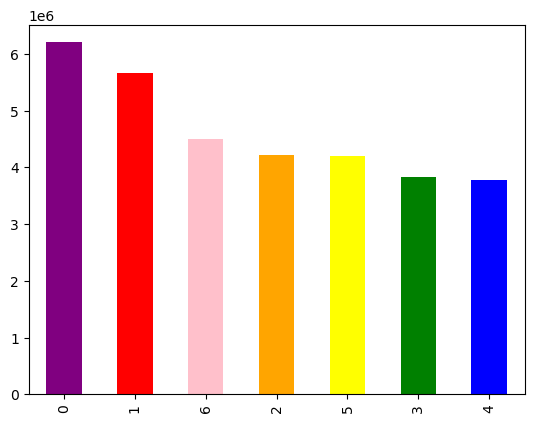

In [7]:
df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

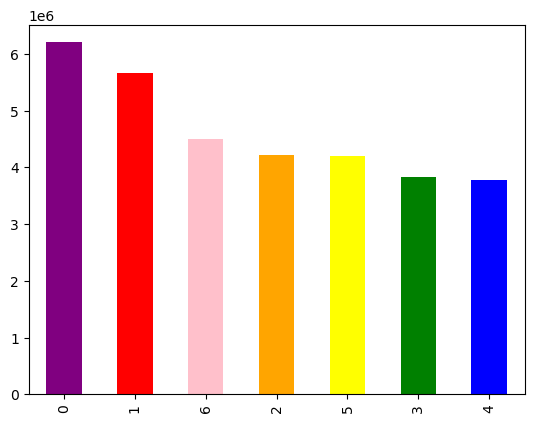

In [9]:
bar = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
# exporting (saving) bar charts

bar.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

#### 3. Histograms

<AxesSubplot:ylabel='Frequency'>

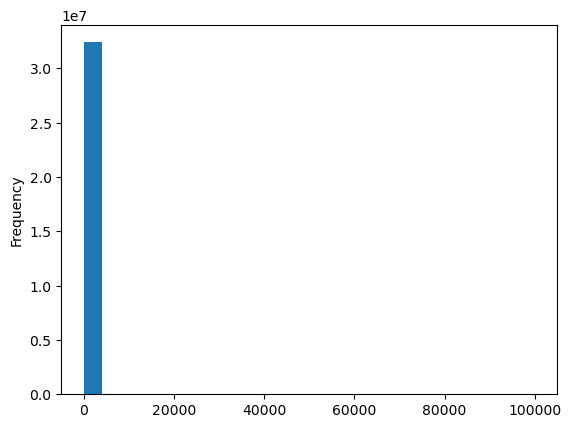

In [11]:
# Creating histogram with 25 bins

df['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

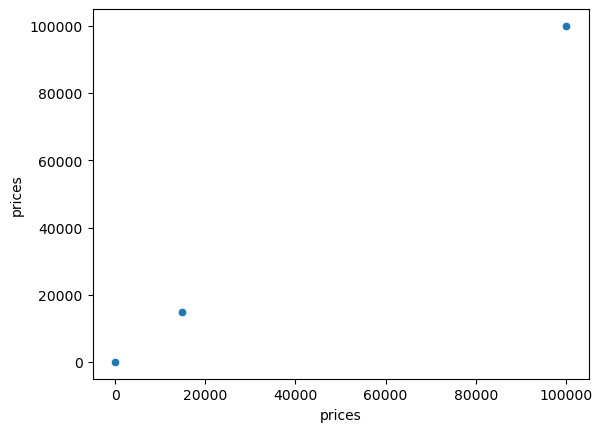

In [12]:
# creating scatterplot to see outliers

sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [24]:
# seeing what prices are over 100 (while limited columns returned because too many columns)

df.loc[df['prices'] > 100, ['order_id', 'prices', 'price_range_loc', 'loyalty_flag', 'spender_type', 'order_frequency']]

,order_id,prices,price_range_loc,loyalty_flag,spender_type,order_frequency
10030345,912404,14900.0,High-range product,Regular customer,High spender,Frequent customer
10030346,603376,14900.0,High-range product,Regular customer,High spender,Frequent customer
10030347,3264360,14900.0,High-range product,Newer customer,High spender,Regular customer
10030348,892534,14900.0,High-range product,Newer customer,High spender,Regular customer
10030349,229704,14900.0,High-range product,Regular customer,High spender,Non-frequent customer
...,...,...,...,...,...,...
29166209,2249946,99999.0,High-range product,Regular customer,High spender,Frequent customer
29166210,2363282,99999.0,High-range product,Regular customer,High spender,Frequent customer
29166211,3181945,99999.0,High-range product,Regular customer,High spender,Frequent customer
29166212,2486215,99999.0,High-range product,Regular customer,High spender,Regular customer


In [26]:
# turning prices over 100 into missing values (nan)

df.loc[df['prices'] >100, 'prices'] = np.nan

In [28]:
df['prices'].max()

25.0

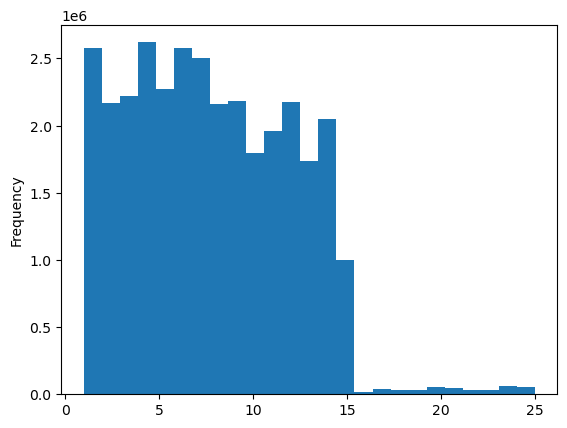

In [32]:
hist = df['prices'].plot.hist(bins = 25)

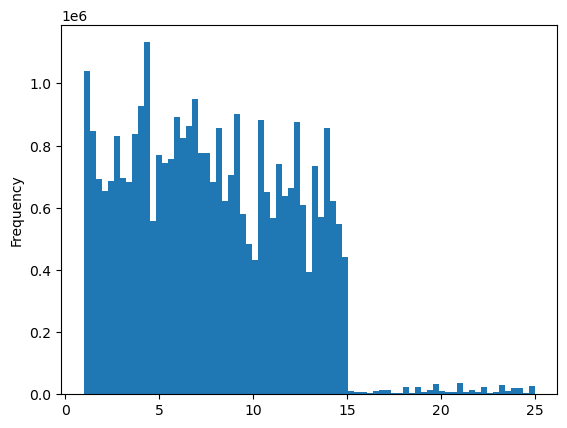

In [33]:
hist2 = df['prices'].plot.hist(bins = 75)

In [43]:
# exporting (saving) histogram charts

hist.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'histogram_prices.png'))

hist2.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'histogram_prices_2.png'))

#### 4. Line Charts

In [36]:
# creating random sample of data by making a new random list of 70% of the values

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [37]:
big = df[dev]
small = df[~dev]

In [38]:
len(big) + len(small)

32404859

In [39]:
df_2 = small[['orders_day_of_week', 'prices']]

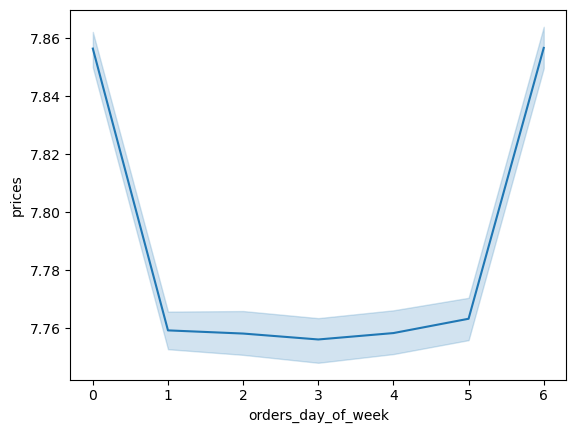

In [40]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [42]:
# exporting (saving) line chart

line.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'line_prices_dow.png'))